**Hierarchical clustering (not from scratch) - Wine Quality Dataset**

**Understanding the Dataset**

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
# Load the dataset
file_path = 'WineQT.csv'
wine_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
wine_data.head()


Saving WineQT.csv to WineQT.csv


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


**Descriptive Statistics**

In [ ]:
# Generating descriptive statistics
descriptive_stats = wine_data.describe()

# Checking for missing values
missing_values = wine_data.isnull().sum()

# Checking data types
data_types = wine_data.dtypes

descriptive_stats, missing_values, data_types

(       fixed acidity  volatile acidity  citric acid  residual sugar  \
 count    1143.000000       1143.000000  1143.000000     1143.000000   
 mean        8.311111          0.531339     0.268364        2.532152   
 std         1.747595          0.179633     0.196686        1.355917   
 min         4.600000          0.120000     0.000000        0.900000   
 25%         7.100000          0.392500     0.090000        1.900000   
 50%         7.900000          0.520000     0.250000        2.200000   
 75%         9.100000          0.640000     0.420000        2.600000   
 max        15.900000          1.580000     1.000000       15.500000   
 
          chlorides  free sulfur dioxide  total sulfur dioxide      density  \
 count  1143.000000          1143.000000           1143.000000  1143.000000   
 mean      0.086933            15.615486             45.914698     0.996730   
 std       0.047267            10.250486             32.782130     0.001925   
 min       0.012000             1.

**Data Visualization**

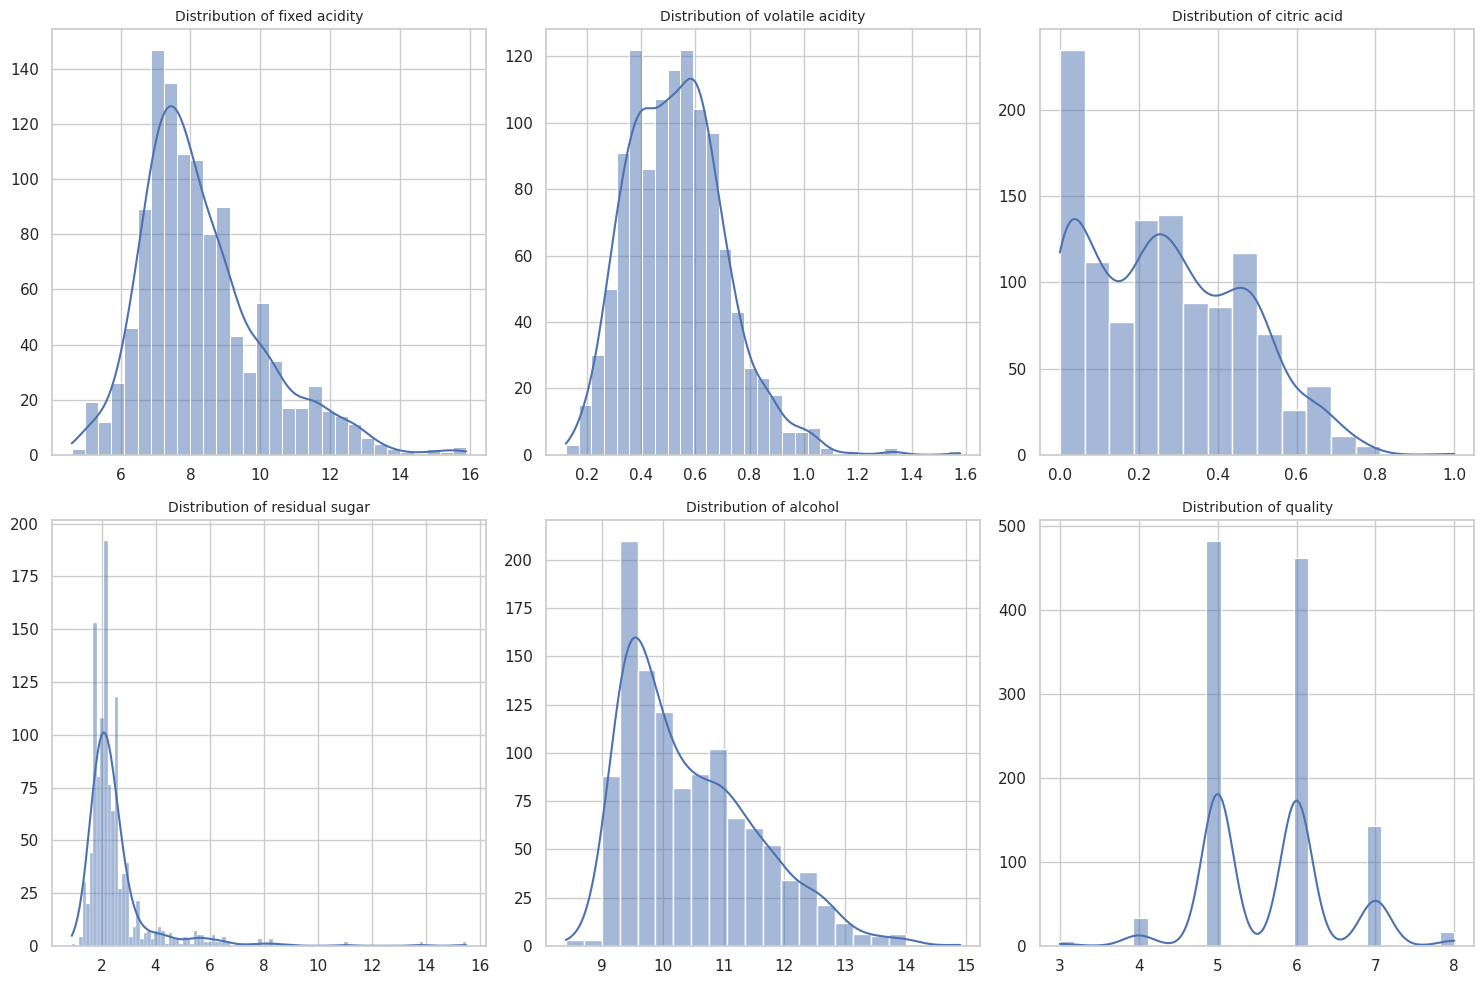

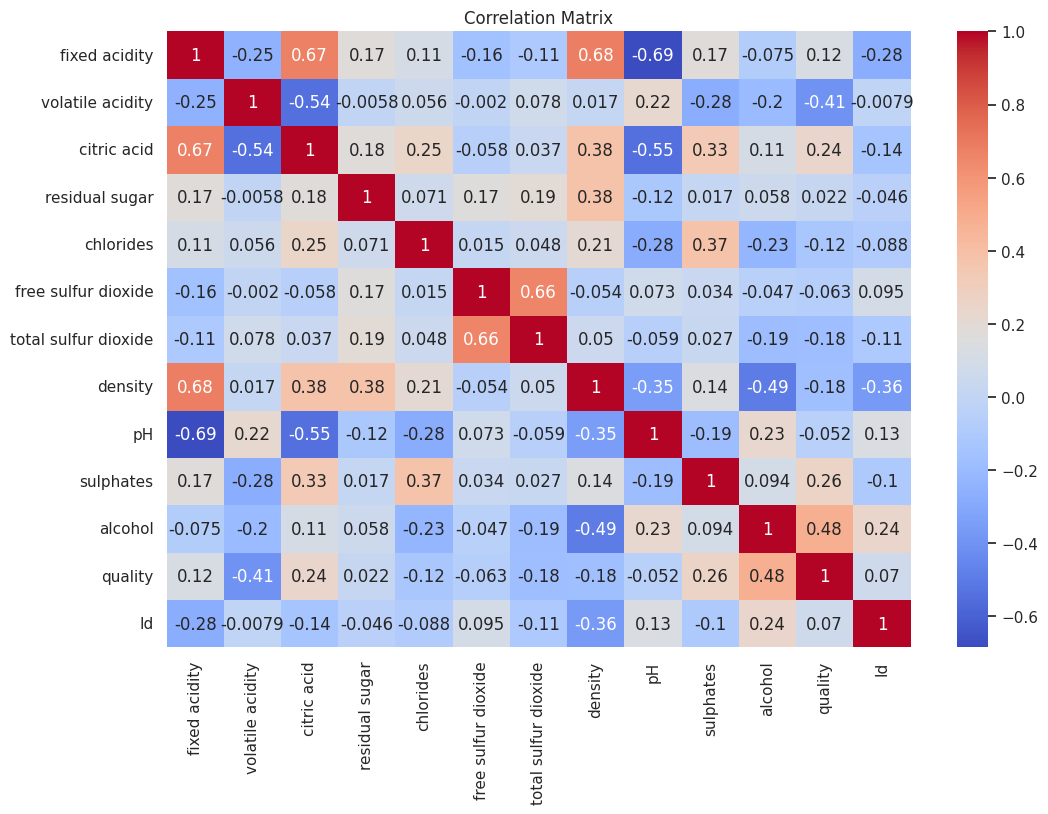

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Plotting distributions of some selected features
features_to_plot = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'alcohol', 'quality']
n_rows = 2
n_cols = 3
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 10))

for i, feature in enumerate(features_to_plot):
    row = i // n_cols
    col = i % n_cols
    sns.histplot(wine_data[feature], kde=True, ax=axs[row, col])
    axs[row, col].set_title(f'Distribution of {feature}', fontsize=10)
    axs[row, col].set_xlabel('')
    axs[row, col].set_ylabel('')

plt.tight_layout()
plt.show()

# Plotting correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = wine_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Hierarchical Clustering Preparation**

**Applying Hierarchical Clustering**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Selecting features for clustering (excluding 'Id' and 'quality')
features_for_clustering = wine_data.columns.difference(['Id', 'quality'])
X = wine_data[features_for_clustering]

# Normalizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Displaying the first few rows of the scaled features
pd.DataFrame(X_scaled, columns=features_for_clustering).head()

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity
0,-0.963382,-0.231395,-1.365027,0.555854,-0.521580,-0.450467,1.270695,-0.466421,-0.573658,-0.363610,0.939332
1,-0.593601,0.234247,-1.365027,0.036165,-0.292593,0.915920,-0.708928,0.050060,0.130881,0.643477,1.941813
2,-0.593601,0.107253,-1.161568,0.140103,-0.292593,-0.060071,-0.325775,-0.171289,-0.045254,0.246745,1.273492
3,-0.593601,-0.252560,1.483400,0.659792,1.653789,0.135127,-0.964363,-0.466421,-0.456235,0.429852,-1.399789
4,-0.963382,-0.231395,-1.365027,0.555854,-0.521580,-0.450467,1.270695,-0.466421,-0.573658,-0.363610,0.939332


**Hierarchical clustering model and analyzing the dendrogram**

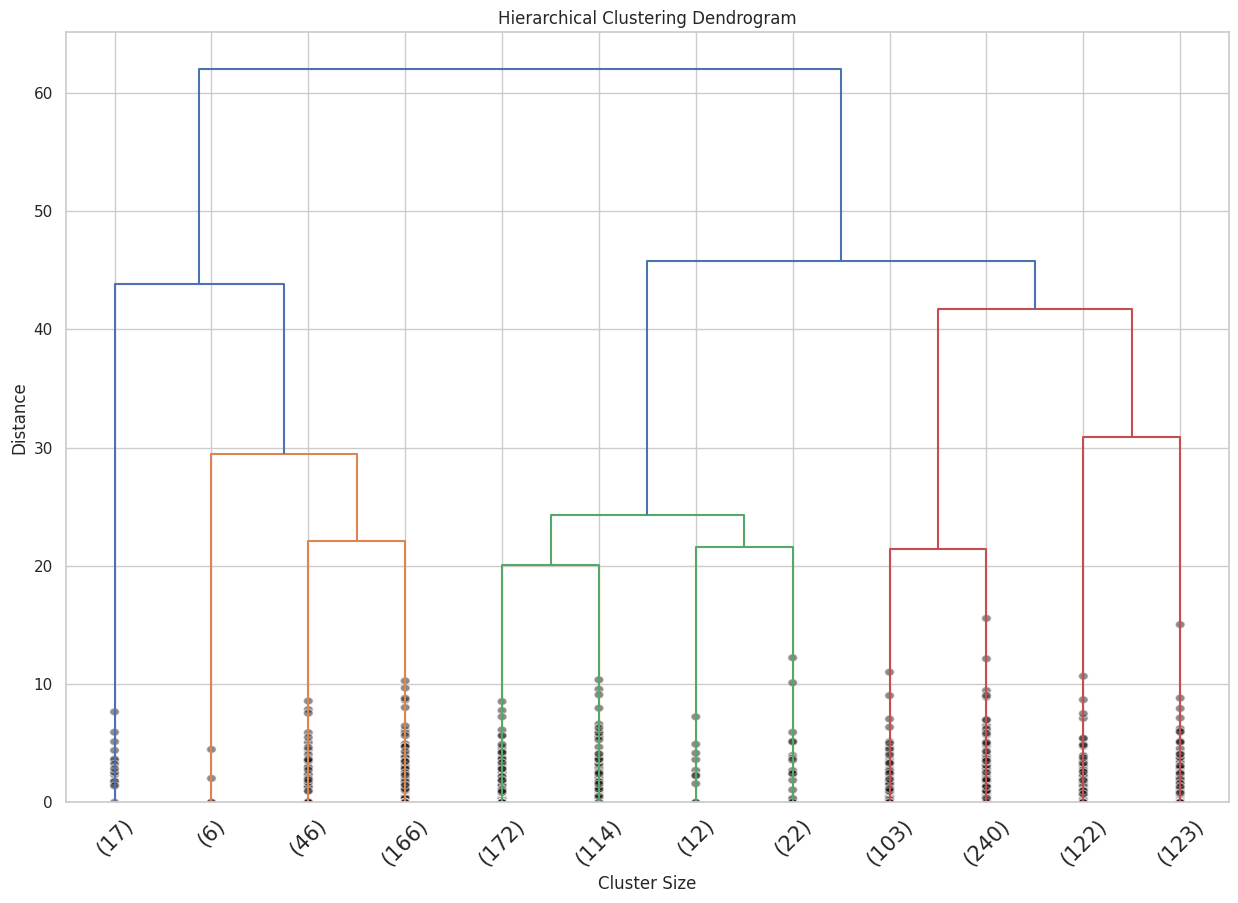

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Performing hierarchical clustering
Z = linkage(X_scaled, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

**Determining the number of clusters and analyzing them**

In [ ]:
from scipy.cluster.hierarchy import fcluster

# Determining the number of clusters
# We choose a distance cutoff to determine the clusters (e.g., half the maximum distance)
distance_cutoff = 0.5 * max(Z[:, 2])
clusters = fcluster(Z, distance_cutoff, criterion='distance')

# Adding the cluster labels to the original dataset
wine_data['Cluster'] = clusters

# Displaying the first few rows with cluster labels
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,Cluster
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,3
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2,3
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4,4


**Cluster analysis and calculate the silhouette score**

In [ ]:
from sklearn.metrics import silhouette_score

# Cluster Analysis: Examining the mean values of features within each cluster
cluster_characteristics = wine_data.groupby('Cluster').mean()

# Calculating Silhouette Score
silhouette_avg = silhouette_score(X_scaled, clusters)

cluster_characteristics, silhouette_avg

(         fixed acidity  volatile acidity  citric acid  residual sugar  \
 Cluster                                                                 
 1             8.470588          0.540588     0.588824        2.047059   
 2            10.787615          0.400069     0.506743        3.264679   
 3             8.203125          0.546750     0.274000        2.650000   
 4             7.604665          0.644723     0.115889        2.261079   
 5             7.226531          0.468633     0.240122        2.139592   
 
          chlorides  free sulfur dioxide  total sulfur dioxide   density  \
 Cluster                                                                   
 1         0.404353            15.411765             55.529412  0.997075   
 2         0.085248             9.674312             27.825688  0.998389   
 3         0.085641            23.064062             80.101562  0.997187   
 4         0.085714            10.370262             29.696793  0.996688   
 5         0.069800     

**Evaluation and Interpretation**

**Cluster Analysis**

We have analyzed the mean values of features within each cluster. This provides insights into the characteristics that define each cluster. For example, clusters differ in average values of features like 'fixed acidity', 'volatile acidity', and 'alcohol'.
The variation in these mean values across clusters indicates that the hierarchical clustering has identified distinct groupings based on the wine's chemical properties.

**Silhouette Score**

The silhouette score is approximately 0.145. The silhouette score ranges from -1 to 1, where a higher value indicates that clusters are well-separated and distinct. A score around 0.145 suggests that while there is some separation, the distinction between clusters is not very pronounced.

**Final Steps: Metrics and Recommendations**

**Metrics Interpretation**: Based on the silhouette score, the clusters formed are somewhat distinct, but there might be room for improvement. Different distance metrics or linkage methods could be experimented with for potentially better clustering.

**Recommendations**: Given the cluster characteristics, we can provide insights or recommendations related to the wine quality, such as which chemical properties might influence the quality most significantly.

**Conclusion**

We have successfully performed hierarchical clustering on the wine quality dataset.
The clusters provide a basic understanding of how wines group together based on their chemical properties.
Further analysis and experimentation with different clustering parameters could yield more distinct clusters.